## Nama : Ari Wilyan Ramadhelza
## NIM    : 1301164708
## Kelas : SIDE-40-GAB01

## Tugas Data Mining - KMeans Clustering

In [954]:
# Initialization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [955]:
# def unique(list1):
#     x = np.array(list1) 
#     return list(np.unique(x))

In [956]:
np.random.seed(200)
list_x = []
list_y = []
max = 300

for i in range(max):
    x = np.random.randint(1, 70)
    y = np.random.randint(1, 70)
    list_x.append(x)
    list_y.append(y)

In [957]:
df = pd.DataFrame({
    'x': list_x,
    'y': list_y
})

In [958]:
df

,x,y
0,27,17
1,69,43
2,56,15
3,58,12
4,7,43
...,...,...
295,62,9
296,38,20
297,21,23
298,42,45


In [959]:
np.random.seed(200)
k = 3
# centroid[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}

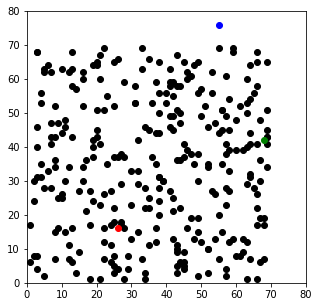

In [960]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [961]:
## Assignment Stage

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
        
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [962]:
df = assignment(df, centroids)
print(df.head())

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  27  17         1.414214        48.020829        65.306967        1     r
1  69  43        50.774009         1.414214        35.846897        2     g
2  56  15        30.016662        29.546573        61.008196        2     g
3  58  12        32.249031        31.622777        64.070274        2     g
4   7  43        33.015148        61.008196        58.249464        1     r


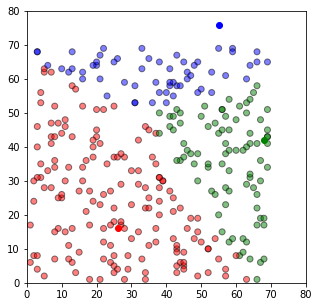

In [963]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

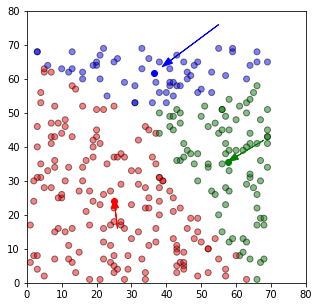

In [964]:
## Update Stage

import copy
old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)

for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

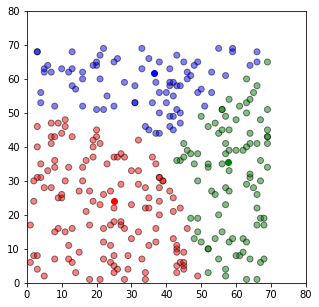

In [965]:
## Repeat Assignment Stage

df = assignment(df, centroids)

# plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

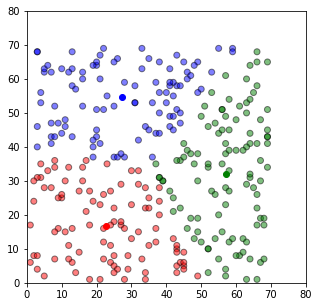

In [966]:
# Continue until all assigned categories don't change any more

while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()